In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.applications.vgg16 import decode_predictions

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train[:200].reshape(-1,28,28)
x_train = np.stack([x_train] * 3, axis=3)
train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in x_train])
y_train = y_train[:200]
train_Y = tf.one_hot(y_train, 10, on_value=1.0, off_value=0.0)

x_test = x_test[:50].reshape(-1,28,28)
x_test = np.stack([x_test] * 3, axis=3)
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in x_test])
y_test = y_test[:50]
test_Y = tf.one_hot(y_test, 10, on_value=1.0, off_value=0.0)

x_show = x_test[:3]
x_show = np.asarray([img_to_array(array_to_img(im, scale=False).resize((224,224))) for im in x_show]).astype(int)
y_show = tf.one_hot(y_test[:3], 1000, on_value=1.0, off_value=0.0)

11501568/11490434 [==============================] - 0s 0us/step


49152/35363 [=========================================] - 0s 0us/step
예측 :  nematode
정답 :  7


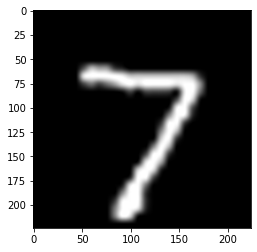

예측 :  nematode
정답 :  2


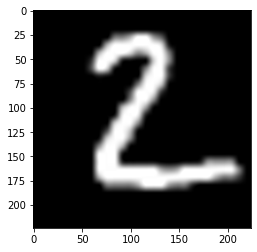

예측 :  nail
정답 :  1


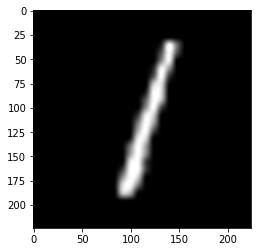

In [3]:
model = VGG16()
pred = decode_predictions(model.predict(x_show), top=1)
for i in range(3):
    print("예측 : ", pred[i][0][1])
    print("정답 : ", np.argmax(y_show[i]))
    plt.imshow(x_show[i])
    plt.show()

58900480/58889256 [==============================] - 1s 0us/step
Epoch 1/50
7/7 - 2s - loss: 13.6672 - acc: 0.2250 - val_loss: 11.3009 - val_acc: 0.2800 - 2s/epoch - 323ms/step
Epoch 2/50
7/7 - 0s - loss: 12.5148 - acc: 0.2300 - val_loss: 10.3323 - val_acc: 0.3000 - 99ms/epoch - 14ms/step
Epoch 3/50
7/7 - 0s - loss: 11.5092 - acc: 0.2300 - val_loss: 9.4302 - val_acc: 0.3000 - 99ms/epoch - 14ms/step
Epoch 4/50
7/7 - 0s - loss: 10.5352 - acc: 0.2400 - val_loss: 8.6131 - val_acc: 0.3200 - 104ms/epoch - 15ms/step
Epoch 5/50
7/7 - 0s - loss: 9.6687 - acc: 0.2600 - val_loss: 7.8573 - val_acc: 0.3200 - 96ms/epoch - 14ms/step
Epoch 6/50
7/7 - 0s - loss: 8.8449 - acc: 0.2600 - val_loss: 7.1687 - val_acc: 0.3200 - 96ms/epoch - 14ms/step
Epoch 7/50
7/7 - 0s - loss: 8.1076 - acc: 0.2700 - val_loss: 6.5452 - val_acc: 0.3200 - 98ms/epoch - 14ms/step
Epoch 8/50
7/7 - 0s - loss: 7.4855 - acc: 0.2650 - val_loss: 6.0088 - val_acc: 0.3000 - 95ms/epoch - 14ms/step
Epoch 9/50
7/7 - 0s - loss: 6.9660 - acc:

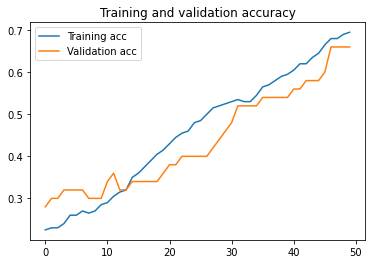

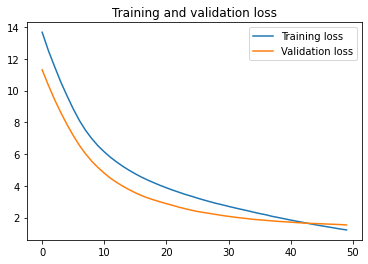

In [4]:
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in x_train])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in x_test])
y_train = tf.one_hot(y_train, 10, on_value=1.0, off_value=0.0)
y_test = tf.one_hot(y_test, 10, on_value=1.0, off_value=0.0)

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10,activation = 'softmax'))

conv_base.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=2e-5),
              metrics=['acc'])

history = model.fit(
      x_train,
      y_train,
      epochs=50,
      validation_data=(x_test, y_test),
      verbose = 2)

plt.plot(range(len(history.history['acc'])), history.history['acc'], label='Training acc')
plt.plot(range(len(history.history['acc'])), history.history['val_acc'], label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(range(len(history.history['acc'])), history.history['loss'], label='Training loss')
plt.plot(range(len(history.history['acc'])), history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

예측 :  7
정답 :  7


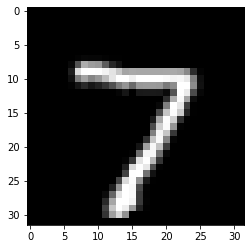

예측 :  7
정답 :  2


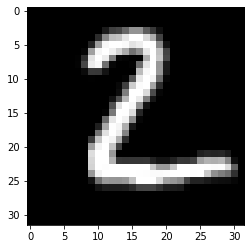

예측 :  1
정답 :  1


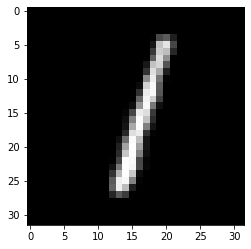

In [5]:
pred = model.predict(x_test[:3])
for i in range(3):
    print("예측 : ", np.argmax(pred[i]))
    print("정답 : ", np.argmax(y_test[i]))
    plt.imshow(x_test[i].astype(int))
    plt.show()

In [6]:
model.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Epoch 1/10
7/7 - 14s - loss: 1.2835 - acc: 0.6950 - val_loss: 1.9488 - val_acc: 0.5800 - 14s/epoch - 2s/step
Epoch 2/10
7/7 - 10s - loss: 0.4378 - acc: 0.8700 - val_loss: 1.6578 - val_acc: 0.6000 - 10s/epoch - 1s/step
Epoch 3/10
7/7 - 10s - loss: 0.1604 - acc: 0.9550 - val_loss: 1.4921 - val_acc: 0.6600 - 10s/epoch - 1s/step
Epoch 4/10
7/7 - 10s - loss: 0.0585 - acc: 0.9850 - val_loss: 1.4535 - val_acc: 0.7400 - 10s/epoch - 1s/step
Epoch 5/10
7/7 - 9s - loss: 0.0171 - acc: 1.0000 - val_loss: 1.3958 - val_acc: 0.7600 - 9s/epoch - 1s/step
Epoch 6/10
7/7 - 9s - loss: 0.0081 - acc: 1.0000 - val_loss: 1.3814 - val_acc: 0.7400 - 9s/epoch - 1s/step
Epoch 7/10
7/7 - 9s - loss: 0.0045 - acc: 1.0000 - val_loss: 1.3840 - val_acc: 0.7400 - 9s/epoch - 1s/step
Epoch 8/10
7/7 - 10s - loss: 0.0036 - acc: 1.0000 - val_loss: 1.3832 - val_acc: 0.7400 - 10s/epoch - 1s/step
Epoch 9/10
7/7 - 10s - loss: 0.0028 - acc: 1.0000 - val_loss: 1.3759 - val_acc: 0.7400 - 10s/epoch - 1s/step
Epoch 10/10
7/7 - 10s - l

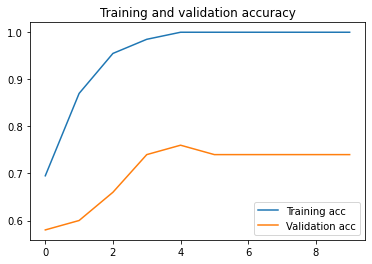

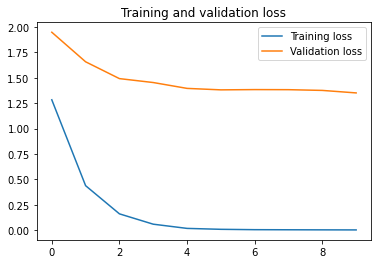

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=2e-5),
              metrics=['acc'])

history = model.fit(
      x_train,
      y_train,
      epochs=10,
      validation_data=(x_test, y_test),
      verbose = 2)

plt.plot(range(len(history.history['acc'])), history.history['acc'], label='Training acc')
plt.plot(range(len(history.history['acc'])), history.history['val_acc'], label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(range(len(history.history['acc'])), history.history['loss'], label='Training loss')
plt.plot(range(len(history.history['acc'])), history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

예측 :  7
정답 :  7


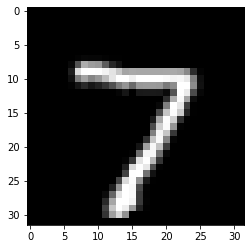

예측 :  2
정답 :  2


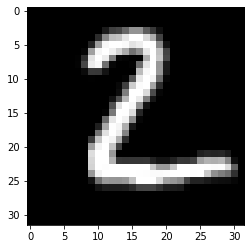

예측 :  1
정답 :  1


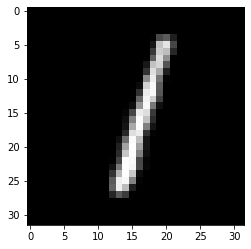

In [8]:
pred = model.predict(x_test[:3])
for i in range(3):
    print("예측 : ", np.argmax(pred[i]))
    print("정답 : ", np.argmax(y_test[i]))
    plt.imshow(x_test[i].astype(int))
    plt.show()